In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import string

In [2]:
# import data files
happiness_df = pd.read_csv('../Resources/Gallup2018.csv')

med_gross_rent_df = pd.read_csv('../Resources/Housing_Data/Median_Gross_Rent_2018.csv', header=0)
med_month_cost_df = pd.read_csv('../Resources/Housing_Data/Median_Monthly_Housing_Costs_2018.csv', header=0)
realtor_df = pd.read_csv('../Resources/Housing_Data/Realtor_com_State_2018.csv')

### look at the data

In [3]:
med_gross_rent_df.head()

,Unnamed: 0,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,Label,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,...,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate
1,Median gross rent,788.00,1177.00,1036.00,731.00,1520.00,1289.00,1171.00,1108.00,1516.00,...,861.00,1046.00,1043.00,969.00,1215.00,1316.00,735.00,847.00,818.00,484.00


In [4]:
med_month_cost_df.head()

,State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,Label,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,...,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate
1,Median monthly housing costs,761.00,1267.00,1029.00,707.00,1626.00,1335.00,1429.00,1134.00,1695.00,...,851.00,1059.00,1160.00,1103.00,1256.00,1381.00,624.00,934.00,883.00,349.00


In [5]:
realtor_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,201812,south carolina,sc,270000.0,-0.0020,0.0425,29272.0,-0.0356,-0.0018,95.0,...,402945.0,-0.0044,0.0483,37616.0,-0.0535,0.0070,0.2851,-0.0238,0.0112,0.0
1,201812,new hampshire,nh,322900.0,0.0014,0.0799,5442.0,-0.1510,-0.0407,95.0,...,423377.0,-0.0040,0.0461,6882.0,-0.1765,-0.0916,0.2646,-0.0391,-0.0708,0.0
2,201812,florida,fl,325000.0,0.0000,0.0156,156299.0,0.0182,0.1179,80.0,...,631230.0,0.0081,0.0028,198104.0,-0.0004,0.0746,0.2636,-0.0262,-0.0562,0.0
3,201812,district of columbia,dc,599900.0,-0.0362,0.0433,1491.0,-0.1906,0.1194,52.0,...,931774.0,0.0283,-0.0199,1826.0,-0.1612,0.0921,0.2153,0.0334,-0.0400,0.0
4,201812,north dakota,nd,232990.0,-0.0081,0.0145,3546.0,-0.0780,0.0281,101.0,...,276041.0,-0.0086,0.0453,3676.0,-0.0833,0.0228,0.0398,-0.0029,-0.0011,0.0


### clean the data and get ready for merging

In [6]:
# clean the median gross rent data

# get rid of the first row of the dataframe
med_gross_rent_df = med_gross_rent_df.iloc[1:, :]

# set the index to Unnamed: 0
med_gross_rent_df = med_gross_rent_df.set_index('Unnamed: 0')

# transpose the data
med_gross_rent_df = med_gross_rent_df.T

# reset the index for the data
med_gross_rent_df = med_gross_rent_df.reset_index()

# rename the column 'index' to state
med_gross_rent_df = med_gross_rent_df.rename(columns={'index': 'State'})

# remove the name for the index column
med_gross_rent_df = med_gross_rent_df.rename_axis(None, axis=1)

# get rid of Puerto Rico and DC data
med_gross_rent_df = med_gross_rent_df[med_gross_rent_df['State'] != 'District of Columbia']
med_gross_rent_df = med_gross_rent_df[med_gross_rent_df['State'] != 'Puerto Rico']

# change values to numeric type
med_gross_rent_df['Median gross rent'] = pd.to_numeric(med_gross_rent_df['Median gross rent'])

# look at the data again
med_gross_rent_df.head()

,State,Median gross rent
0,Alabama,788.0
1,Alaska,1177.0
2,Arizona,1036.0
3,Arkansas,731.0
4,California,1520.0


In [7]:
# clean the median monthly housing cost data

# get rid of the first row of the dataframe
med_month_cost_df = med_month_cost_df.iloc[1:, :]

# set the index to state
med_month_cost_df = med_month_cost_df.set_index('State')

# transpose the data
med_month_cost_df = med_month_cost_df.transpose()

# reset the index for the data
med_month_cost_df = med_month_cost_df.reset_index()

# rename the column
med_month_cost_df = med_month_cost_df.rename(columns={'State': '', 'index': 'State'})

# remove the name of the index
med_month_cost_df = med_month_cost_df.rename_axis(None, axis=1)

# get rid of Puerto Rico and DC data
med_month_cost_df = med_month_cost_df[med_month_cost_df['State'] != 'District of Columbia']
med_month_cost_df = med_month_cost_df[med_month_cost_df['State'] != 'Puerto Rico']

# change values to numeric type
med_month_cost_df['Median monthly housing costs'] = pd.to_numeric(med_month_cost_df['Median monthly housing costs'])

# look at the data again
med_month_cost_df.head()

,State,Median monthly housing costs
0,Alabama,761.0
1,Alaska,1267.0
2,Arizona,1029.0
3,Arkansas,707.0
4,California,1626.0


In [8]:
# clean the realtor.com data

# extract only the columns that we want
print(realtor_df.columns)
realtor_df = realtor_df[['month_date_yyyymm', 'state', 'median_listing_price', 'median_listing_price_per_square_foot', 'average_listing_price']]

# capitalize the state names so that we can merge on them
realtor_df['state'] = realtor_df['state'].apply(lambda x: string.capwords(x))

# drop any rows with missing data
realtor_df = realtor_df.dropna(how='any')

# get the mean of the columns throughout the year (group by state and get mean)
realtor_mean_df = realtor_df.groupby(['state']).mean()
realtor_mean_df = realtor_mean_df.reset_index()

# get rid of DC data
realtor_mean_df = realtor_mean_df[realtor_mean_df['state'] != 'District of Columbia']

# rename the state column for merging
realtor_mean_df = realtor_mean_df.rename(columns={'state': 'State'})

# look at the data again
realtor_mean_df.head()

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
 

,State,median_listing_price,median_listing_price_per_square_foot,average_listing_price
0,Alabama,211806.000000,100.416667,2.812128e+05
1,Alaska,280616.000000,165.750000,3.227736e+05
2,Arizona,328732.500000,163.083333,5.137870e+05
3,Arkansas,179922.916667,97.000000,2.468225e+05
4,California,536155.833333,293.416667,1.014058e+06


In [9]:
# clean the happiness data set to get ready to merge
happiness_df = happiness_df.drop(columns=['2018 sample size', 'Well-Being Index Rank', 'Career', 'Social', 'Community', 'Physical'])

In [10]:
happiness_df.head()

,State,Well-Being Index,Financial
0,Hawaii,64.6,1
1,Wyoming,64.2,6
2,Alaska,63.9,2
3,Montana,63.5,17
4,Utah,63.4,13


### merge the data sets

In [11]:
# merge all housing dataframes into one dataframe
housing_df = pd.merge(med_month_cost_df, med_gross_rent_df, on='State')
housing_df = pd.merge(housing_df, realtor_mean_df, on='State')
housing_df.head()

,State,Median monthly housing costs,Median gross rent,median_listing_price,median_listing_price_per_square_foot,average_listing_price
0,Alabama,761.0,788.0,211806.000000,100.416667,2.812128e+05
1,Alaska,1267.0,1177.0,280616.000000,165.750000,3.227736e+05
2,Arizona,1029.0,1036.0,328732.500000,163.083333,5.137870e+05
3,Arkansas,707.0,731.0,179922.916667,97.000000,2.468225e+05
4,California,1626.0,1520.0,536155.833333,293.416667,1.014058e+06


In [12]:
# merge the happiness and housing data sets
housing_happy_df = pd.merge(housing_df, happiness_df, on='State')
housing_happy_df.head()

,State,Median monthly housing costs,Median gross rent,median_listing_price,median_listing_price_per_square_foot,average_listing_price,Well-Being Index,Financial
0,Alabama,761.0,788.0,211806.000000,100.416667,2.812128e+05,59.9,45
1,Alaska,1267.0,1177.0,280616.000000,165.750000,3.227736e+05,63.9,2
2,Arizona,1029.0,1036.0,328732.500000,163.083333,5.137870e+05,62.1,26
3,Arkansas,707.0,731.0,179922.916667,97.000000,2.468225e+05,58.7,50
4,California,1626.0,1520.0,536155.833333,293.416667,1.014058e+06,62.2,27


### exploratory data analysis

In [13]:
housing_happy_df.describe()

,Median monthly housing costs,Median gross rent,median_listing_price,median_listing_price_per_square_foot,average_listing_price,Well-Being Index,Financial
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.00000
mean,1045.160000,992.020000,292274.255000,149.070000,4.545287e+05,61.466000,25.50000
std,262.970656,218.013994,105190.126229,66.892406,2.335027e+05,1.488817,14.57738
min,624.000000,731.000000,165370.416667,84.500000,2.264488e+05,57.000000,1.00000
25%,848.000000,822.500000,214166.416667,116.062500,2.878095e+05,60.650000,13.25000
50%,953.500000,913.500000,277680.208333,129.958333,3.842767e+05,61.500000,25.50000
75%,1214.500000,1124.500000,340073.750000,165.083333,5.500093e+05,62.425000,37.75000
max,1628.000000,1613.000000,687635.416667,505.750000,1.302492e+06,64.600000,50.00000


In [14]:
# look for state with highest and lowest cost

# create a copy of the dataframe
exporing_df = housing_happy_df.drop(columns=['Financial'])

# set state as the index
exporing_df = exporing_df.set_index('State')

# print max cost states
print('States with maximum values:')
print(exporing_df.idxmax())

# print min cost states
print('\nStates with minimum values:')
print(exporing_df.idxmin())

States with maximum values:
Median monthly housing costs            Hawaii
Median gross rent                       Hawaii
median_listing_price                    Hawaii
median_listing_price_per_square_foot    Hawaii
average_listing_price                   Hawaii
Well-Being Index                        Hawaii
dtype: object

States with minimum values:
Median monthly housing costs            West Virginia
Median gross rent                            Arkansas
median_listing_price                    West Virginia
median_listing_price_per_square_foot           Kansas
average_listing_price                   West Virginia
Well-Being Index                        West Virginia
dtype: object


### graphing and testing correlation

In [15]:
# save the columns as variables to make graphing easier
well_being = housing_happy_df.iloc[:,6]
med_hou_cost = housing_happy_df.iloc[:,1]
med_gross_rent = housing_happy_df.iloc[:,2]
med_list_pri = housing_happy_df.iloc[:,3]
med_list_per_sq_ft = housing_happy_df.iloc[:,4]
avg_list_pri = housing_happy_df.iloc[:,5]

#### well being vs. median monthly housing costs

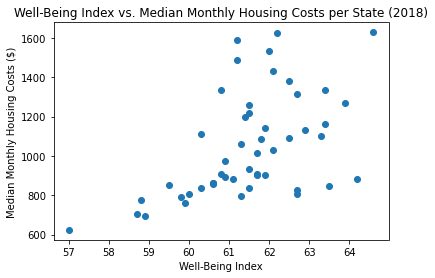

In [16]:
# well being vs median monthly housing costs

# plot the scatter plot
plt.scatter(well_being, med_hou_cost)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Median Monthly Housing Costs ($)')
plt.title('Well-Being Index vs. Median Monthly Housing Costs per State (2018)')

plt.show()

The r-squared is: 0.27502027477229724
The correlation between both factors is 0.52


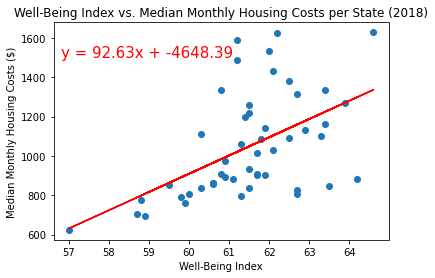

In [17]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, med_hou_cost)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, med_hou_cost)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(56.8, 1500),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Median Monthly Housing Costs ($)')
plt.title('Well-Being Index vs. Median Monthly Housing Costs per State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, med_hou_cost)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVMedianHouse.png")

#### well being vs. median gross rent

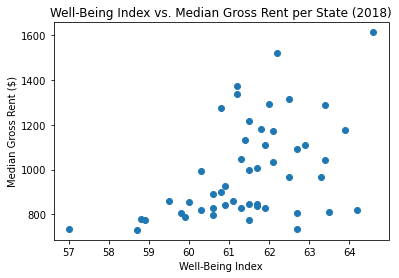

In [18]:
# well being vs median gross rent

# plot the scatter plot
plt.scatter(well_being, med_gross_rent)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Median Gross Rent ($)')
plt.title('Well-Being Index vs. Median Gross Rent per State (2018)')

plt.show()

The r-squared is: 0.21819492324571396
The correlation between both factors is 0.47


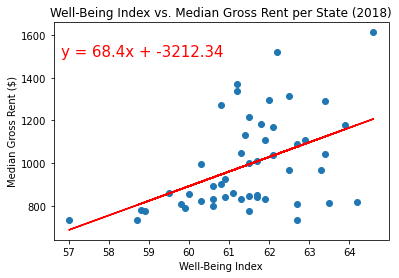

In [19]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, med_gross_rent)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, med_gross_rent)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(56.8, 1500),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Median Gross Rent ($)')
plt.title('Well-Being Index vs. Median Gross Rent per State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, med_gross_rent)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVMedianRent.png")

#### well being vs. median listing price

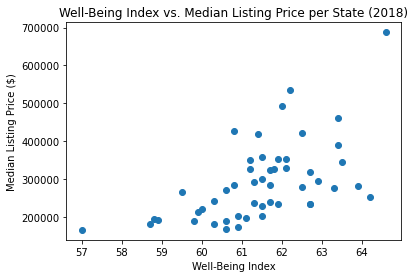

In [20]:
# well being vs median listing price

# plot the scatter plot
plt.scatter(well_being, med_list_pri)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Median Listing Price ($)')
plt.title('Well-Being Index vs. Median Listing Price per State (2018)')

plt.show()

The r-squared is: 0.3234785851760248
The correlation between both factors is 0.57


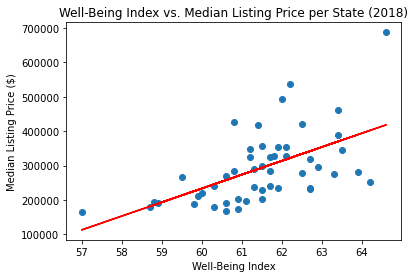

In [21]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, med_list_pri)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, med_list_pri)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(56.8, 1500),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Median Listing Price ($)')
plt.title('Well-Being Index vs. Median Listing Price per State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, med_list_pri)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVMedianListing.png")

#### well being vs. median listing price per square foot

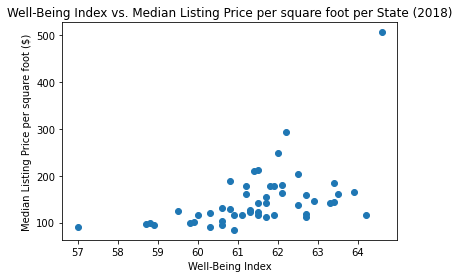

In [22]:
# well being vs median listing price per square foot

# plot the scatter plot
plt.scatter(well_being, med_list_per_sq_ft)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Median Listing Price per square foot ($)')
plt.title('Well-Being Index vs. Median Listing Price per square foot per State (2018)')

plt.show()

The r-squared is: 0.2580333932402284
The correlation between both factors is 0.51


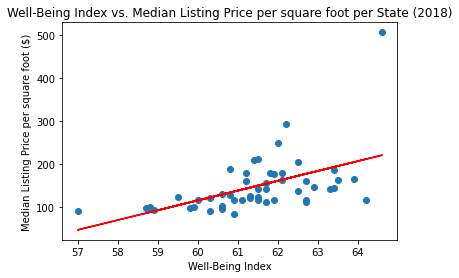

In [23]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, med_list_per_sq_ft)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, med_list_per_sq_ft)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(56.8, 1500),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Median Listing Price per square foot ($)')
plt.title('Well-Being Index vs. Median Listing Price per square foot per State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, med_list_per_sq_ft)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVMedianSqFt.png")

#### well being vs. average listing price

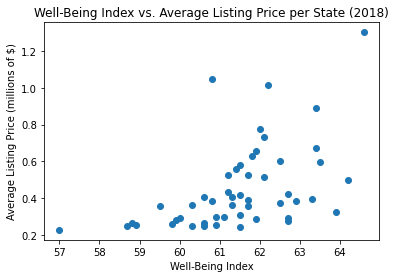

In [24]:
# well being vs average listing price

# convert average listing price to millions
avg_list_pri_mil = avg_list_pri / 1000000

# plot the scatter plot
plt.scatter(well_being, avg_list_pri_mil)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Average Listing Price (millions of $)')
plt.title('Well-Being Index vs. Average Listing Price per State (2018)')

plt.show()

The r-squared is: 0.24982700659439985
The correlation between both factors is 0.5


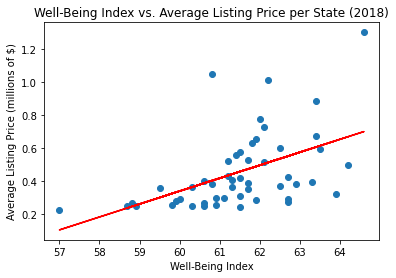

In [25]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, avg_list_pri_mil)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, avg_list_pri_mil)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(56.8, 1500),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Average Listing Price (millions of $)')
plt.title('Well-Being Index vs. Average Listing Price per State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, avg_list_pri_mil)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVAvgListing.png")